In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('mushroom.csv')
data
## This dataset includes descriptions of hypothetical samples corresponding to different specis of gilled mushrooms.
#Each specis id identified as  edible or poisonous. 
#Depending on other information from other attributes, one has to predict the class of mushroom edible or poisonous. 

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# EDA

In [3]:
df=pd.DataFrame(data=data)
df.shape

(8123, 23)

In [4]:
df.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [5]:
df.info()
#no null values present
# all attributes are object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   p       8123 non-null   object
 1   x       8123 non-null   object
 2   s       8123 non-null   object
 3   n       8123 non-null   object
 4   t       8123 non-null   object
 5   p.1     8123 non-null   object
 6   f       8123 non-null   object
 7   c       8123 non-null   object
 8   n.1     8123 non-null   object
 9   k       8123 non-null   object
 10  e       8123 non-null   object
 11  e.1     8123 non-null   object
 12  s.1     8123 non-null   object
 13  s.2     8123 non-null   object
 14  w       8123 non-null   object
 15  w.1     8123 non-null   object
 16  p.2     8123 non-null   object
 17  w.2     8123 non-null   object
 18  o       8123 non-null   object
 19  p.3     8123 non-null   object
 20  k.1     8123 non-null   object
 21  s.3     8123 non-null   object
 22  u       8123 non-null   

In [6]:
df.describe()
# no statistical analysis could be made since attributes are not numerical

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [7]:
le=LabelEncoder()
# We need to convert the object attributes information into numerical one

In [8]:
df['p']=le.fit_transform(df['p'])

In [9]:
df['x']=le.fit_transform(df['x'])

In [10]:
df['s']=le.fit_transform(df['s'])

In [11]:
df['n']=le.fit_transform(df['n'])

In [12]:
df['t']=le.fit_transform(df['t'])

In [13]:
df['p.1']=le.fit_transform(df['p.1'])

In [14]:
df['f']=le.fit_transform(df['f'])

In [15]:
df['c']=le.fit_transform(df['c'])

In [16]:
df['n.1']=le.fit_transform(df['n.1'])

In [17]:
df['k']=le.fit_transform(df['k'])

In [18]:
df['e']=le.fit_transform(df['e'])

In [19]:
df['e.1']=le.fit_transform(df['e.1'])

In [20]:
df['s.1']=le.fit_transform(df['s.1'])

In [21]:
df['s.2']=le.fit_transform(df['s.2'])

In [22]:
df['w']=le.fit_transform(df['w'])

In [23]:
df['w.1']=le.fit_transform(df['w.1'])

In [24]:
df['w.2']=le.fit_transform(df['w.2'])

In [25]:
df['p.2']=le.fit_transform(df['p.2'])

In [26]:
df['o']=le.fit_transform(df['o'])

In [27]:
df['p.3']=le.fit_transform(df['p.3'])

In [28]:
df['k.1']=le.fit_transform(df['k.1'])

In [29]:
df['s.3']=le.fit_transform(df['s.3'])

In [30]:
df['u']=le.fit_transform(df['u'])

In [32]:
df.describe()
# seems no outliers are present in the dataset
#mean is greater than median in most of the attributes. so data might be skewed

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,...,8123.000000,8123.000000,8123.000000,8123.0,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,0.481965,3.347901,1.827650,4.504740,0.415487,4.144528,0.974147,0.161517,0.309122,4.810784,...,1.603595,5.816201,5.794534,0.0,1.965530,1.069432,2.291764,3.596947,3.644097,1.508187
std,0.499705,1.604323,1.229947,2.545972,0.492836,2.103758,0.158705,0.368030,0.462160,3.540565,...,0.676001,1.901819,1.907362,0.0,0.242684,0.271080,1.801683,2.382744,1.252139,1.719645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [33]:
df.skew()
#checking skewness
# Since the dataset is having only object data in all the entries, we dont need to remove the skewness. 

p      0.072201
x     -0.246839
s     -0.590773
n      0.706854
t      0.343051
p.1   -0.080555
f     -5.976678
c      1.839889
n.1    0.826228
k      0.061324
e     -0.271632
e.1    0.948311
s.1   -1.098553
s.2   -0.757513
w     -1.835253
w.1   -1.791413
p.2    0.000000
w.2   -6.946490
o      2.701431
p.3   -0.289803
k.1    0.548227
s.3   -1.413251
u      0.985957
dtype: float64

# Univariate Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x292c20d3fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x292c20e1fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c20d3cc8>],
 'medians': [<matplotlib.lines.Line2D at 0x292c20efdc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c20efec8>],
 'means': []}

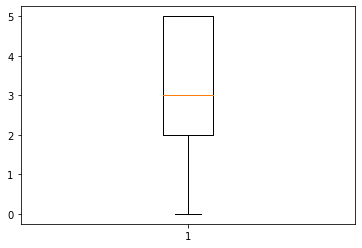

In [34]:
plt.boxplot(df['x'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c2188748>,
 'caps': [<matplotlib.lines.Line2D at 0x292c2188fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c2181c88>],
 'medians': [<matplotlib.lines.Line2D at 0x292c218cf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c2192dc8>],
 'means': []}

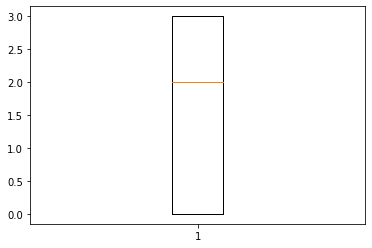

In [35]:
plt.boxplot(df['s'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c21fa488>,
 'caps': [<matplotlib.lines.Line2D at 0x292c21fad08>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c21f5988>],
 'medians': [<matplotlib.lines.Line2D at 0x292c2200c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c2204b08>],
 'means': []}

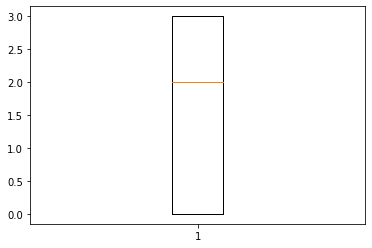

In [36]:
plt.boxplot(df['s'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c2269f08>,
 'caps': [<matplotlib.lines.Line2D at 0x292c226cf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c2269648>],
 'medians': [<matplotlib.lines.Line2D at 0x292c2272fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c2272f88>],
 'means': []}

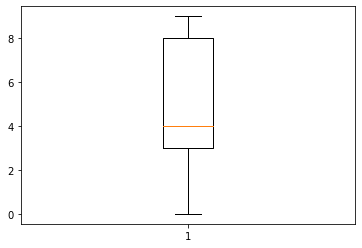

In [37]:
plt.boxplot(df['n'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c22ccec8>,
 'caps': [<matplotlib.lines.Line2D at 0x292c22d3fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c22cc6c8>],
 'medians': [<matplotlib.lines.Line2D at 0x292c22d7f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c22d7ec8>],
 'means': []}

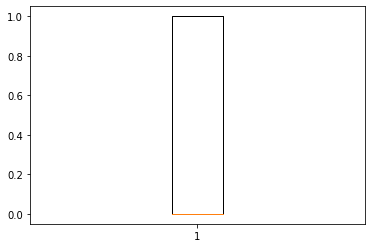

In [38]:
plt.boxplot(df['t'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c2336f48>,
 'caps': [<matplotlib.lines.Line2D at 0x292c2338b08>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c2336608>],
 'medians': [<matplotlib.lines.Line2D at 0x292c233dc08>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c2340c08>],
 'means': []}

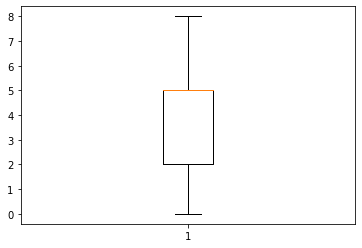

In [39]:
plt.boxplot(df['p.1'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c23a7688>,
 'caps': [<matplotlib.lines.Line2D at 0x292c23a7f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c23a0bc8>],
 'medians': [<matplotlib.lines.Line2D at 0x292c23aae48>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c23b0e48>],
 'means': []}

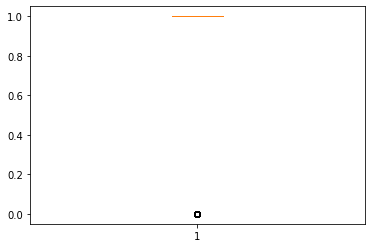

In [40]:
plt.boxplot(df['f'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c240bf08>,
 'caps': [<matplotlib.lines.Line2D at 0x292c240efc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c240b748>],
 'medians': [<matplotlib.lines.Line2D at 0x292c2413f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c2413ec8>],
 'means': []}

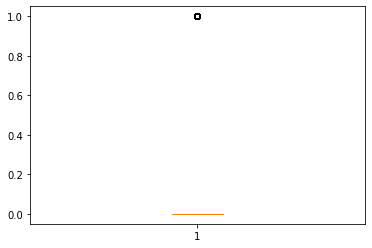

In [41]:
plt.boxplot(df['c'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c2475788>,
 'caps': [<matplotlib.lines.Line2D at 0x292c2475e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c246fcc8>],
 'medians': [<matplotlib.lines.Line2D at 0x292c2477f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c247edc8>],
 'means': []}

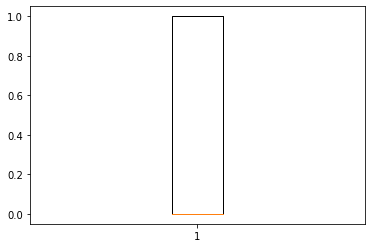

In [42]:
plt.boxplot(df['n.1'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c24ddd88>,
 'caps': [<matplotlib.lines.Line2D at 0x292c24dfd48>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c24dd2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x292c24e5cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c24e5dc8>],
 'means': []}

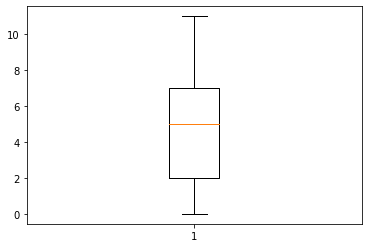

In [43]:
plt.boxplot(df['k'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c2547308>,
 'caps': [<matplotlib.lines.Line2D at 0x292c2547b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c2543848>],
 'medians': [<matplotlib.lines.Line2D at 0x292c254aac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c2550948>],
 'means': []}

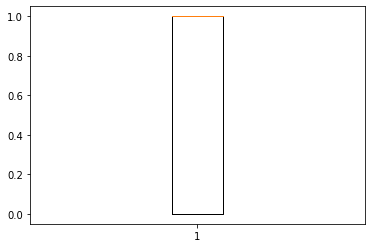

In [44]:
plt.boxplot(df['e'])
#No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x292c25af948>,
 'caps': [<matplotlib.lines.Line2D at 0x292c25b48c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x292c25a9e88>],
 'medians': [<matplotlib.lines.Line2D at 0x292c25b4fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x292c25b7fc8>],
 'means': []}

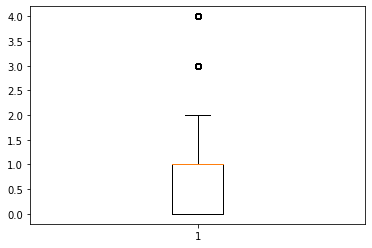

In [45]:
plt.boxplot(df['e.1'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x292c26188c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x292c2618888>,
 'cmins': <matplotlib.collections.LineCollection at 0x292c2625908>,
 'cbars': <matplotlib.collections.LineCollection at 0x292c2625dc8>}

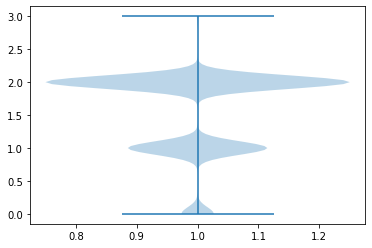

In [46]:
plt.violinplot(df['s.1'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x292c268fb48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x292c2684908>,
 'cmins': <matplotlib.collections.LineCollection at 0x292c2696bc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x292c2696b48>}

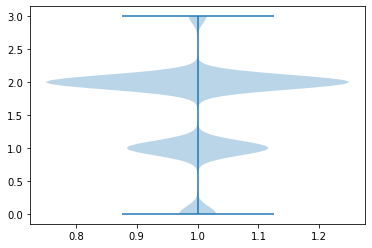

In [47]:
plt.violinplot(df['s.2'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x292c26fd888>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x292c268f908>,
 'cmins': <matplotlib.collections.LineCollection at 0x292c2705988>,
 'cbars': <matplotlib.collections.LineCollection at 0x292c2705e48>}

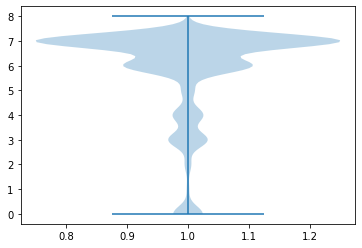

In [48]:
plt.violinplot(df['w'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x292c27729c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x292c2765788>,
 'cmins': <matplotlib.collections.LineCollection at 0x292c2777a08>,
 'cbars': <matplotlib.collections.LineCollection at 0x292c2777988>}

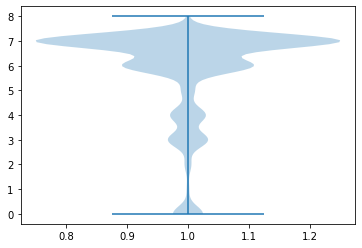

In [49]:
plt.violinplot(df['w.1'])

# Bivariate Analysis

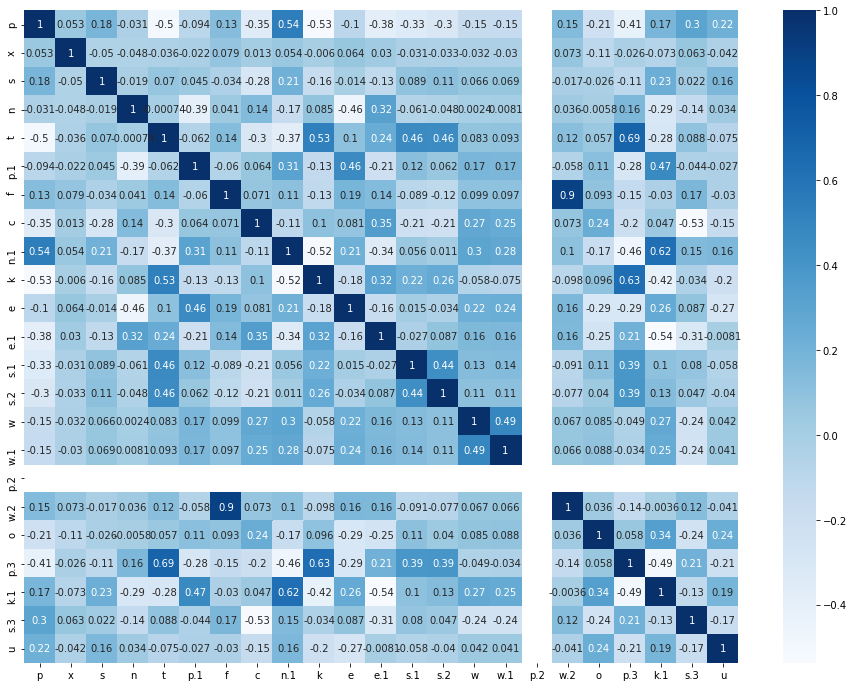

In [51]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
#Here P is the target column. we have to check the co realtion of other attributes with P
#Most of the columns are positively corelated with P while column p.3,t,c,k,o is having negative relation with target column
#column P.2 carries no relatuon with any other attributes

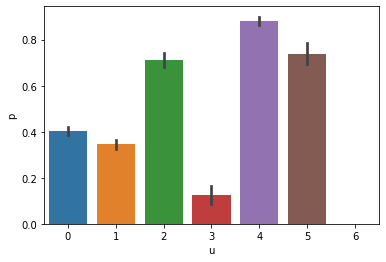

In [52]:
sns.barplot(x='u',y='p',data=df)

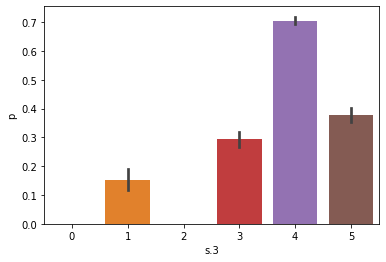

In [53]:
sns.barplot(x='s.3',y='p',data=df)

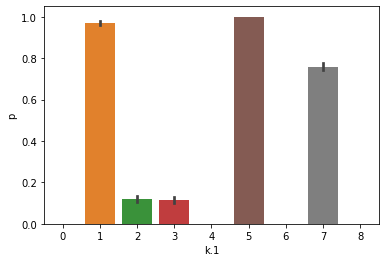

In [54]:
sns.barplot(x='k.1',y='p',data=df)

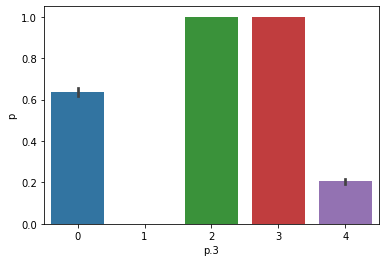

In [55]:
sns.barplot(x='p.3',y='p',data=df)

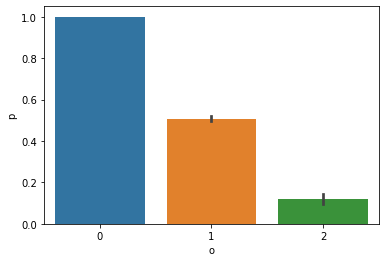

In [56]:
sns.barplot(x='o',y='p',data=df)

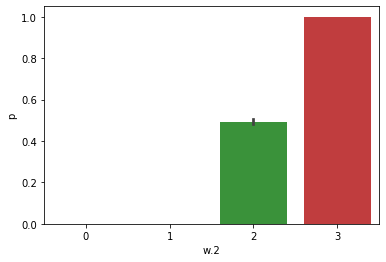

In [57]:
sns.barplot(x='w.2',y='p',data=df)

# Data Preprocessing to train the model

In [60]:
x=df.iloc[:,1:]
x.shape

(8123, 22)

In [61]:
y=df.iloc[:,0]
y

0       0
1       0
2       1
3       0
4       0
       ..
8118    0
8119    0
8120    0
8121    1
8122    0
Name: p, Length: 8123, dtype: int32

In [102]:
# Since the target attributes carries binary output, so we have to apply Logistic Regression to train the model
# Optimising the seed value

In [94]:
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum accuracy score corresponding to random state',finalr,'is',maxr)


accuracy score correspondng to random state 41 is: 0.9528108329913828
accuracy score correspondng to random state 42 is: 0.9528108329913828
accuracy score correspondng to random state 43 is: 0.9552728764874846
accuracy score correspondng to random state 44 is: 0.9499384489125975
accuracy score correspondng to random state 45 is: 0.9466557242511284
accuracy score correspondng to random state 46 is: 0.9528108329913828
accuracy score correspondng to random state 47 is: 0.9597866228970046
accuracy score correspondng to random state 48 is: 0.9532211735740664
accuracy score correspondng to random state 49 is: 0.9454247025030775
accuracy score correspondng to random state 50 is: 0.9425523184242922
accuracy score correspondng to random state 51 is: 0.951579811243332
accuracy score correspondng to random state 52 is: 0.9589659417316373
accuracy score correspondng to random state 53 is: 0.9474764054164957
accuracy score correspondng to random state 54 is: 0.9503487894952811
accuracy score corres

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.3)
# Here we use seed value (random state) of 47 to train the model

In [99]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
score=accuracy_score(y_test,pred)
matrix=confusion_matrix(y_test,pred)
report=classification_report(y_test,pred)
pred=lg.predict(x_test)
print(score)
print(matrix)
print(report)
print(pred)
print('\n')

0.9597866228970046
[[1254   34]
 [  64 1085]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1288
           1       0.97      0.94      0.96      1149

    accuracy                           0.96      2437
   macro avg       0.96      0.96      0.96      2437
weighted avg       0.96      0.96      0.96      2437

[1 1 1 ... 0 1 1]




In [91]:
# Cross Validiating the score
cvs=cross_val_score(lg,x,y,cv=10,scoring='accuracy')
print(cvs)
print(cvs.mean())

[0.67158672 0.85362854 0.9803198  0.98522167 0.89778325 0.86083744
 1.         0.99630542 0.62684729 0.93349754]
0.8806027666187992


Trying other algorithms to achive better model performance 

In [92]:
model= [DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]

In [93]:
for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    Pred=i.predict(x_test)
    AS=accuracy_score(y_test,Pred)
    cvs=cross_val_score(i,x,y,cv=10,scoring='accuracy').mean()
    print('accuracy score of',i,'is:',AS)
    print(AS)
    print(confusion_matrix(y_test,Pred))
    print(classification_report(y_test,Pred))
    print(cvs)
    print('\n')

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 1.0
1.0
[[1288    0]
 [   0 1149]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1288
           1       1.00      1.00      1.00      1149

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437

0.9671568538345483


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
 

So we can see DecisionTreeClassifier is giving best model performance 

In [69]:
dtc=DecisionTreeClassifier()
param_grid={'criterion':['ginni','entropy']}
grid=GridSearchCV(dtc,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

1.0
{'criterion': 'entropy'}


In [70]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1288
           1       1.00      1.00      1.00      1149

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



In [72]:
pred
## predicting the output

array([1, 1, 1, ..., 0, 1, 1])

# AUC ROC Curve

Graphical representaion of Model performace (accuracy score)

In [78]:
y_pred_prob=dtc.predict_proba(x_test)[:,-1]
y_pred_prob

array([1., 1., 1., ..., 0., 1., 1.])

In [79]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

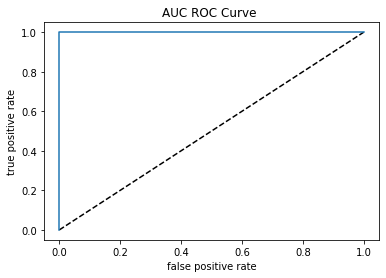

In [83]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AUC ROC Curve ')
plt.show()

In [86]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.9589509376233181


# Saving The Model

In [85]:
joblib.dump(dtc,'dtcmushroom.obj')

['dtcmushroom.obj']